# Cardio Catch Diseases

## Predicting cardiovascular diseases

## 1. Business Problem.

Cardio Catch Diseases is a company specialized in detecting heart disease in the early stages. Its business model lies in offering an early diagnosis of cardiovascular disease for a certain price.
Currently, the diagnosis of cardiovascular disease is manually made by a team of specialists. The current accuracy of the diagnosis varies between 55% and 65%, due to the complexity of the diagnosis and also the fatigue of the team who take turns to minimize the risks. The cost of each diagnosis, including the devices and the payroll of the analysts, is around $1,000.00.
The price of the diagnosis, paid by the client, varies according to the precision achieved by the team of specialists.

| Exam Accuracy | Price          | Rules                                    | Example                         |
|:--------------|:---------------|:-----------------------------------------|:--------------------------------|
| Above 50%     | min \$500\.00  | \+\$500 for each additional 5% precision | Precision = 55% \-> \$1,000\.00 |
| Up to 50%     | $0\.00         | N/A                                      | N/A                             |

Thus, we see that different values in the exam precision, given by the team of specialists, make the company either have a profitable operation, revenue greater than the cost, or an operation with a loss, revenue less than the cost. This instability of the diagnosis makes the company to have an unpredictable cashflow.

## 2. Business Assumptions.

The assumptions about the business problem is as follows:

- **CVDs are the number 1 cause of death globally**: more people die annually from CVDs than from any other cause.
- An estimated **17.9 million** people died from CVDs in 2016, representing 31% of all global deaths. Of these deaths, 85% are due to heart attack and stroke.
- Over three quarters of CVD deaths take place in **low- and middle-income countries**.
- Out of the **17 million** premature deaths (under the age of 70) due to noncommunicable diseases in 2015, **82%** are in low- and middle-income countries, and 37% are caused by CVDs.
- Most cardiovascular diseases can be **prevented by addressing behavioural risk factors** such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.
- People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) **need early detection and management** using counselling and medicines, as appropriate.


## 3. Solution Strategy



My strategy to solve this challenge was:

**Step 01. Data Description:** My goal is to use statistics metrics to identify data outside the scope of business.

**Step 02. Feature Engineering:** Derive new attributes based on the original variables to better describe the phenomenon that will be modeled.

**Step 03. Data Filtering:** Filter rows and select columns that do not contain information for modeling or that do not match the scope of the business.

**Step 04. Exploratory Data Analysis:** Explore the data to find insights and better understand the impact of variables on model learning.

**Step 05. Data Preparation:** Prepare the data so that the Machine Learning models can learn the specific behavior.

**Step 06. Feature Selection:** Selection of the most significant attributes for training the model.

**Step 07. Machine Learning Modelling:** Machine Learning model training

**Step 08. Hyperparameter Fine Tunning:** Choose the best values for each of the parameters of the model selected from the previous step.

**Step 09. Convert Model Performance to Business Values:** Convert the performance of the Machine Learning model into a business result.

**Step 10. Deploy Modelo to Production:** Publish the model in a cloud environment so that other people or services can use the results to improve the business decision.

## 4. Top 3 Data Insights

- **false.** People who smoke have more cardiovascular diseases.
- **true.** People up to 30 years old have the least cardiovascular diseases.
- **false.** People who do not practice physical activity have more cardiovascular diseases.

## 5. Machine Learning Model Applied

Tests were made using different algorithms.

## 6. Machine Learning Modelo Performance
The chosen algorithm was the **CatBoost Classifier**. In addition, I made a performance calibration on it.

#### Precision, Recall and other metrics

These are the metrics obtained from the test set.

| precision | recall  | f1\-score | accuracy |
|-----------|---------|-----------|----------|
| 0\.7350   | 0\.7313 | 0\.7331   | 0\.7303  |

## 7. Conclusions

There is still more work to do.

## 8. Lessons Learned

- I learned to convert model to business.

- learned a new algorithm (CatBoost).

- I learned to use confusion matrix

## 9. Next Steps to Improve

- Try to improve Feature Engineering, creating more variables

- Improve my Exploratory Data Analysis with more hypotheses and a mind map.

- Improve my Data Preparation and use better encodings

- Do Hyperparameter Fine Tunning to get better accuracy to increase business value.

- Deploy Model to Production

# 0.0. IMPORTS

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib

from IPython.display import HTML

from sklearn.model_selection import train_test_split

## 0.1. Loading Data

In [2]:
df = pd.read_csv('../data/cardio_train.csv',sep=';')

## 0.2. Helper Fuctions

In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 1.0. DATA DESCRIPTION

In [4]:
df1 = df.copy()

## 1.1. Data Dimensions

In [5]:
print(f'number of rows: {df1.shape[0]}')
print(f'number of columns: {df1.shape[1]}')

number of rows: 70000
number of columns: 13


## 1.2. Data Types

In [6]:
df1.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

## 1.3. Check NA

In [7]:
df1.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## 1.4. Change Age

In [8]:
df1['age'] = df1['age'].apply(lambda x: round(x / 365))
df1['weight'] = df1['weight'].apply(lambda x: round(x))

# 2.0. DESCRIPTIVE ANALYSIS

In [9]:
df2 = df1.copy()

## 2.1. Numerical

In [10]:
da = pd.DataFrame({

    'min': df2.apply(lambda x: x.min()), 
    'max': df2.apply(lambda x: x.max()),
    'range': df2.apply(lambda x: x.max() - x.min()),

    'mean': df2.apply(lambda x: x.mean()),
    'median': df2.apply(lambda x: x.median()),
    'std': df2.apply(lambda x: np.std(x)),

    'skew': df2.apply(lambda x: x.skew()),
    'kurtosis': df2.apply(lambda x: x.kurtosis())
})

da #1 female - 2 male

,min,max,range,mean,median,std,skew,kurtosis
id,0,99999,99999,49972.419900,50001.5,28851.096242,-0.001278,-1.198374
age,30,65,35,53.338686,54.0,6.765246,-0.306444,-0.821815
gender,1,2,1,1.349571,1.0,0.476835,0.630960,-1.601935
height,55,250,195,164.359229,165.0,8.210068,-0.642187,7.943653
weight,10,200,190,74.205543,72.0,14.395726,1.012070,2.586848
ap_hi,-150,16020,16170,128.817286,120.0,154.010319,85.296214,7580.074738
ap_lo,-70,11000,11070,96.630414,80.0,188.471184,32.114083,1425.914585
cholesterol,1,3,2,1.366871,1.0,0.680245,1.587123,0.993901
gluc,1,3,2,1.226457,1.0,0.572266,2.397462,4.294377
smoke,0,1,1,0.088129,0.0,0.283482,2.905867,6.444250


# 3.0. FEATURE ENGINEERING

In [11]:
df3 = df2.copy()

In [12]:
df3['imc'] = df3.apply(lambda x: x['weight'] / (x['height'] * x['height']), axis=1).astype(str)
df3['imc'] = df3['imc'].apply(lambda x: x[4:6]).astype(int)

df3['classificacao_imc'] = df3['imc'].apply(lambda x: 'abaixo_do_peso' if x <= 18 else
         'peso_normal' if x >= 19 and x <= 25 else 
         'sobrepeso' if x >= 26 and x <= 30 else
         'obesidade_grau_1 ' if x >= 31 and x <= 35 else
         'obesidade_grau_2'  if x >= 32 and x <= 40 else
         'obesidade_grau_3' if x >= 33 and x <= 40 else
         'Obesidade_grau_4'
         )

# 4.0. DATA ANALYSIS

In [13]:
df4 = df3.copy()

## 4.1. LIST HYPOTHESIS

- Pessoas que fumam tem mais doenças cardiovasculares.

- Pessoas que não praticam atividade fisica tem mais doenças cardiovasculares.


- Pessoas de até 30 anos são os que tem menos doenças cardiovasculares.

- Pessoas acima do peso tem mais doenças cardiovasculares.

### 4.1.0. Validate Hypothesis

#### Pessoas que fumam tem mais doenças cardiovasculares.


In [16]:
aux = df4[['smoke', 'cardio']].groupby('smoke').sum().reset_index()
aux

,smoke,cardio
0,0,32050
1,1,2929


#### Pessoas que não praticam atividade fisica tem mais doenças cardiovasculares.


In [62]:
df4[(df4['active'] == 1) & (df4['cardio'] == 0)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,imc,classificacao_imc
0,0,50,2,168,62,110,80,1,1,0,0,1,0,21,peso_normal
6,9,61,1,157,93,130,80,3,1,0,0,1,0,37,obesidade_grau_2
8,13,48,1,158,71,110,70,1,1,0,0,1,0,28,sobrepeso
10,15,62,1,169,80,120,80,1,1,0,0,1,0,28,sobrepeso
11,16,52,2,173,60,120,80,1,1,0,0,1,0,20,peso_normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69987,99979,52,1,151,49,120,80,1,1,0,0,1,0,21,peso_normal
69988,99981,60,1,160,59,110,70,1,1,0,0,1,0,23,peso_normal
69991,99988,56,1,159,72,130,90,2,2,0,0,1,0,28,sobrepeso
69995,99993,53,2,168,76,120,80,1,1,1,0,1,0,26,sobrepeso


In [60]:
aux = df4[['active', 'cardio']].groupby('active').sum().reset_index() # por terem a doença, são talvez obrigados a fazerem atividade fisica.
aux

,active,cardio
0,0,7361
1,1,27618


#### Pessoas de até 30 anos não tem doenças cardiovasculares.


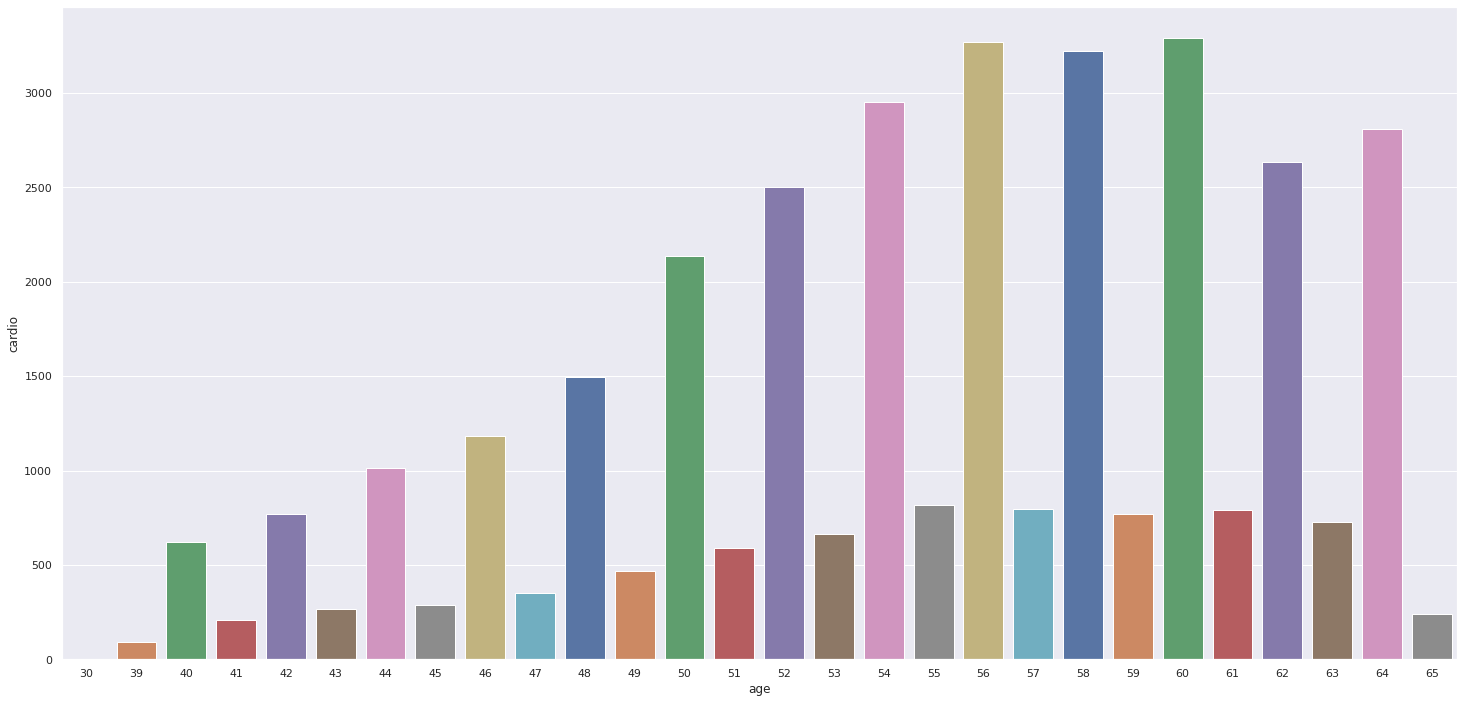

In [18]:
aux = df4[df4['age'] >= 30]
aux = aux[['age', 'cardio']].groupby('age').sum().reset_index()#.sort_values(by='cardio', ascending=True)
sns.barplot(x='age', y='cardio', palette="deep", data=aux);

#### Pessoas acima do peso tem mais doenças cardiovasculares.

In [19]:
df4['imc'] = df4.apply(lambda x: x['weight'] / (x['height'] * x['height']), axis=1).astype(str)
df4['imc'] = df4['imc'].apply(lambda x: x[4:6]).astype(int)

df4['classificacao_imc'] = df4['imc'].apply(lambda x: 'abaixo_do_peso' if x <= 18 else
         'peso_normal' if x >= 19 and x <= 25 else 
         'sobrepeso' if x >= 26 and x <= 30 else
         'obesidade_grau_1 ' if x >= 31 and x <= 35 else
         'obesidade_grau_2'  if x >= 32 and x <= 40 else
         'obesidade_grau_3' if x >= 33 and x <= 40 else
         'Obesidade_grau_4'
         )

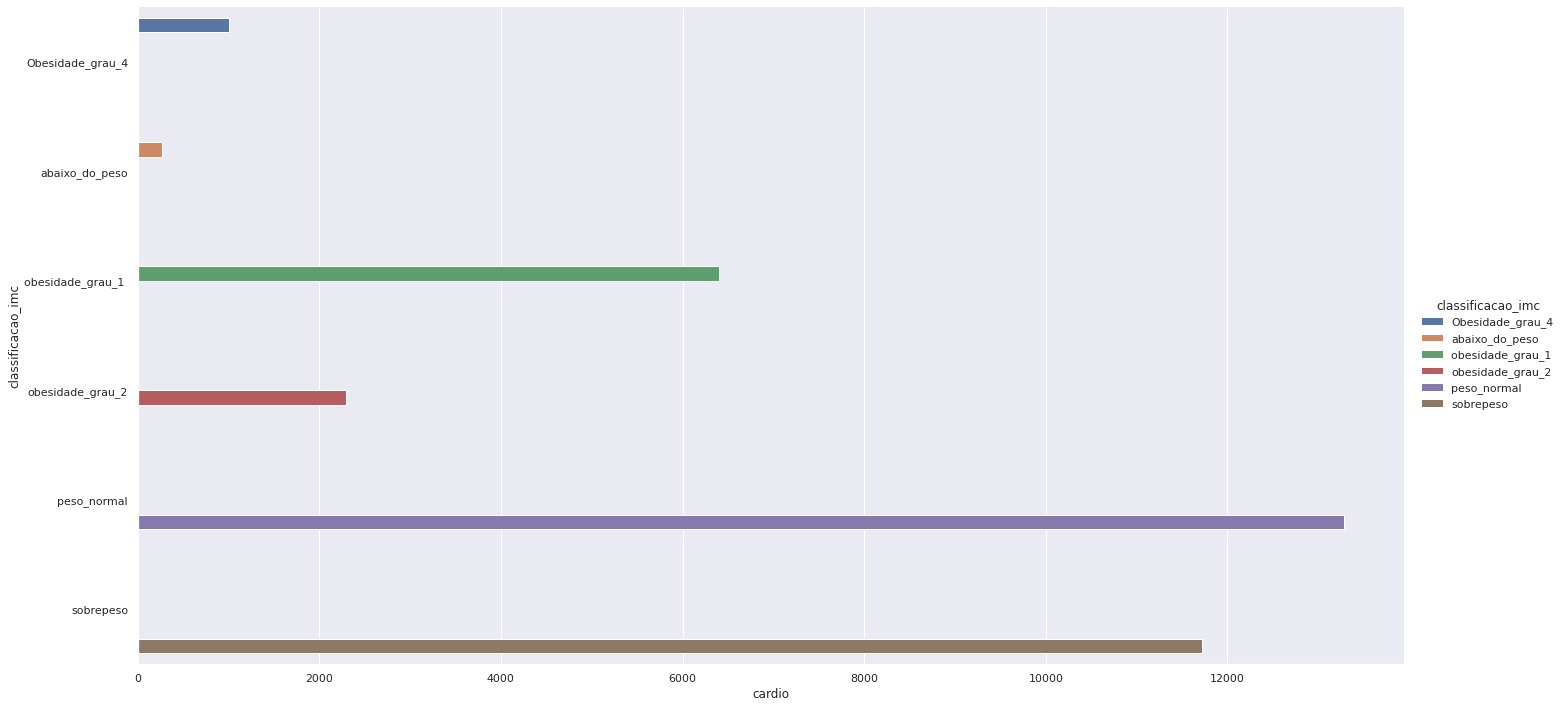

In [20]:
aux = df4[['classificacao_imc', 'cardio']].groupby('classificacao_imc').sum().reset_index()

sns.catplot(
    data=aux, kind="bar",
    x="cardio", y="classificacao_imc", hue="classificacao_imc",
    height=10, aspect=2
);

# 5.0. DATA PREPARATION

In [21]:
df5 = df4.copy()

## 5.1. Encoding

In [22]:
df5 = pd.get_dummies(df5, prefix=['classificacao_imc'], columns=['classificacao_imc'])

# 6.0. FEATURE SELECTION

In [23]:
df6 = df5.copy()

In [24]:
X = df6.drop('cardio', axis=1)
y = df6['cardio'].copy()

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# 7.0. MODEL

In [26]:
from sklearn    import metrics         as m
from scikitplot import metrics         as mt

## 7.1.0 NearestCentroid

In [65]:
from sklearn.neighbors import NearestCentroid

              precision    recall  f1-score   support

           0       0.49      0.49      0.49      7039
           1       0.49      0.49      0.49      6961

    accuracy                           0.49     14000
   macro avg       0.49      0.49      0.49     14000
weighted avg       0.49      0.49      0.49     14000



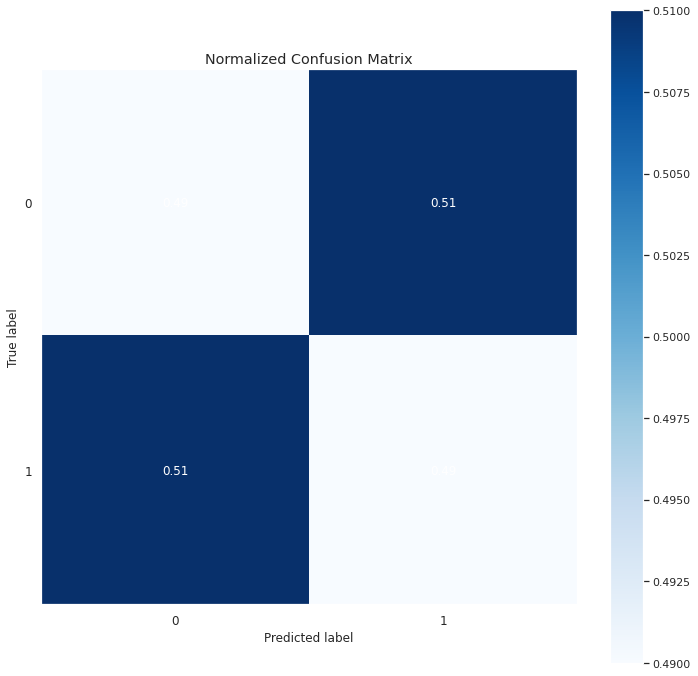

In [66]:
clf = NearestCentroid()
clf.fit(x_train, y_train)
predict = clf.predict(x_test)

print(m.classification_report(y_test, predict))
mt.plot_confusion_matrix(y_test, predict, normalize=True, figsize=(12,12));

In [67]:
price_per_percent = 500/5 
baseline = 50
num_pacients = 70000

model_accuracy = m.accuracy_score(y_test, predict) 

accuracy = model_accuracy
deviation = model_accuracy.std() * 2

accuracy_lower = ( accuracy - deviation ) * 100
accuracy_upper = ( accuracy + deviation ) * 100

percent_difference_lower = accuracy_lower - baseline
percent_difference_upper = accuracy_upper - baseline

amount_best = percent_difference_upper * price_per_percent * num_pacients
amount_worst = percent_difference_lower * price_per_percent * num_pacients

print(f'Best:  ${round(amount_best, 2):,.2f}')
print(f'worst:  ${round(amount_worst, 2):,.2f}')

Best:  $-6,150,000.00
worst:  $-6,150,000.00


## 7.2.0 CatBoostClassifier

In [68]:
from catboost import CatBoostClassifier

0:	learn: 0.6687723	total: 6.73ms	remaining: 26.9ms
1:	learn: 0.6492530	total: 11.7ms	remaining: 17.5ms
2:	learn: 0.6328143	total: 16.9ms	remaining: 11.3ms
3:	learn: 0.6193413	total: 21.7ms	remaining: 5.43ms
4:	learn: 0.6076817	total: 30.2ms	remaining: 0us
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      7039
           1       0.76      0.67      0.71      6961

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



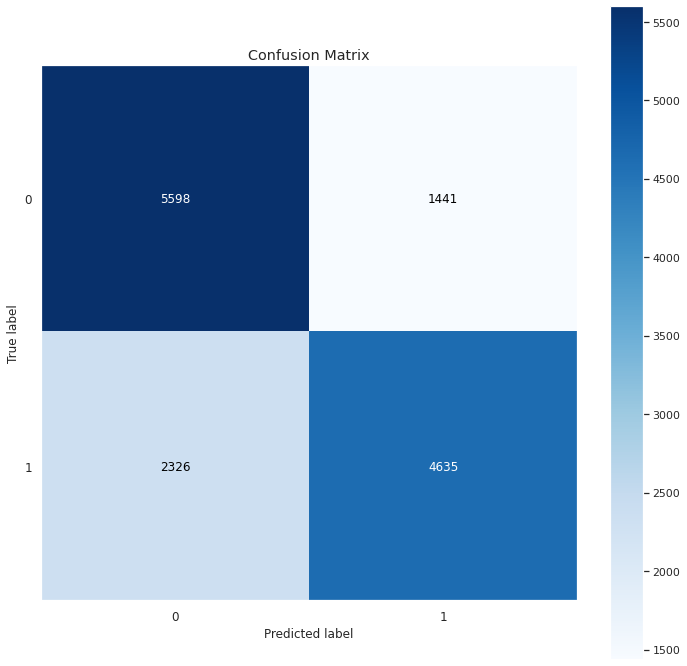

In [69]:
clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)

clf.fit(x_train, y_train);
predict = clf.predict(data=x_test)

print(m.classification_report(y_test, predict))
mt.plot_confusion_matrix(y_test, predict, normalize=False, figsize=(12,12));

### 7.2.1 Convert model to business 

In [70]:
price_per_percent = 500/5 
baseline = 50
num_pacients = 70000

model_accuracy = m.accuracy_score(y_test, predict) 

accuracy = model_accuracy
deviation = model_accuracy.std() * 2

accuracy_lower = ( accuracy - deviation ) * 100
accuracy_upper = ( accuracy + deviation ) * 100

percent_difference_lower = accuracy_lower - baseline
percent_difference_upper = accuracy_upper - baseline

amount_best = percent_difference_upper * price_per_percent * num_pacients
amount_worst = percent_difference_lower * price_per_percent * num_pacients

print(f'Best:  ${round(amount_best, 2):,.2f}')
print(f'worst:  ${round(amount_worst, 2):,.2f}')

Best:  $161,650,000.00
worst:  $161,650,000.00
